## 1. Importing Libraries and Setting Up the Environment

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## 2. Data Loading and Basic Exploration

In [33]:
df = pd.read_csv("survey_lung_cancer.csv")

In [34]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [36]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [37]:
# Select Categorical data

cat_data = df.select_dtypes("object")

# Select Numerical data

num_data = df.select_dtypes("int64")

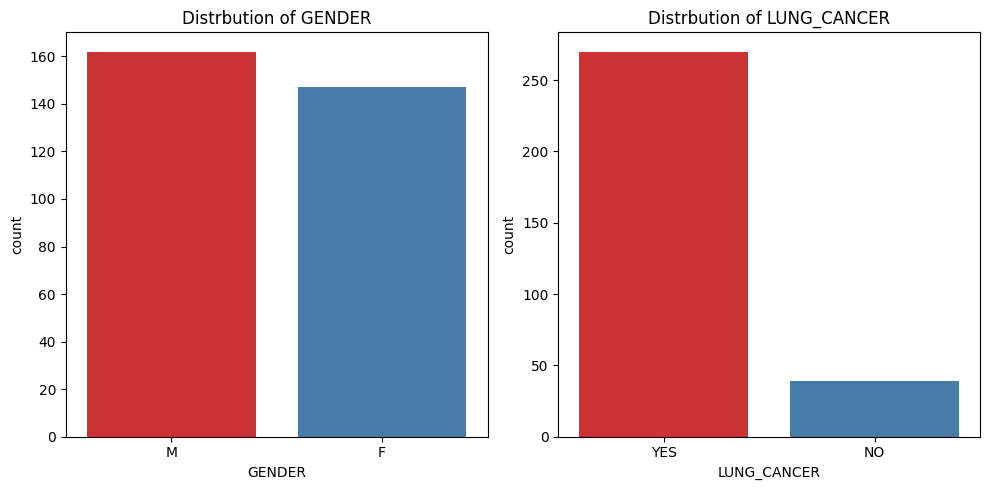

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
for i,col in enumerate(cat_data.columns):
    axs=ax[i%2]
    sns.countplot(x=df[col],ax=axs,palette='Set1')
    axs.set_title(f'Distrbution of {col}')

plt.tight_layout()
plt.show()

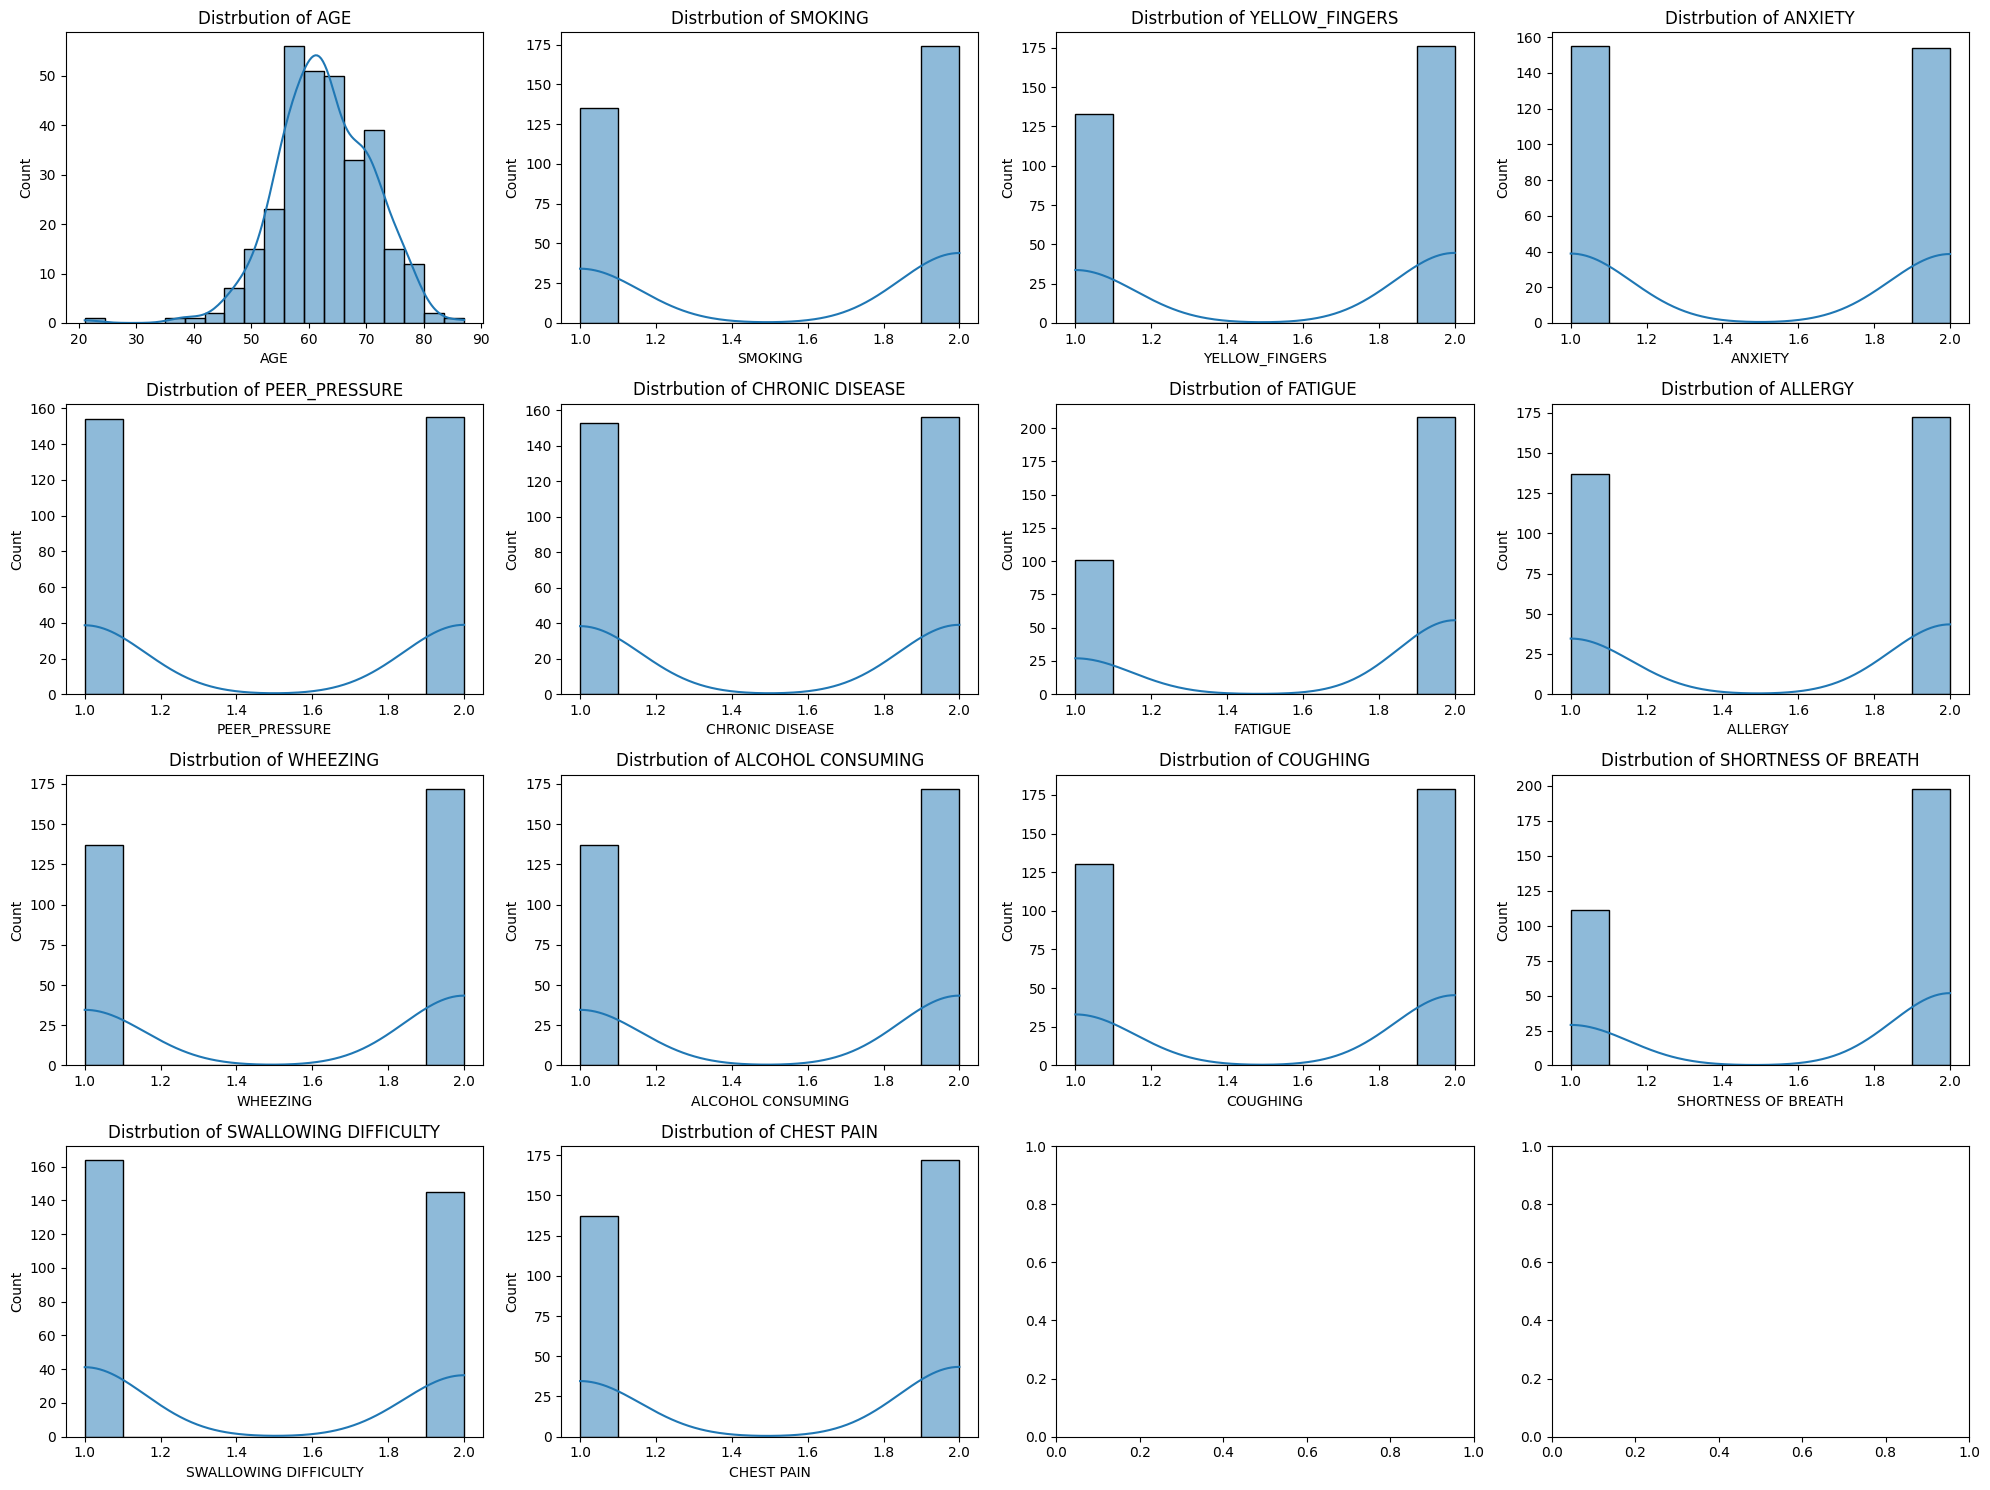

In [39]:
fig,ax = plt.subplots(4,4,figsize=(20,15))
for i, col in enumerate(num_data.columns):
    axs = ax[i//4,i%4]
    sns.histplot(x=df[col], ax=axs,palette="Set1", kde=True)
    axs.set_title(f'Distrbution of {col}')

plt.tight_layout()
plt.show()

## Data preprocessing 

In [ ]:
## convert Categorical data into numerical data

gender_colum = pd.get_dummies(df['GENDER'],drop_first=True)# One Hot Encoding

In [41]:
df = pd.concat([gender_colum,df], axis=1)

In [42]:
df.head()

,M,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [43]:
df.drop("GENDER", axis=1, inplace=True)

In [44]:
df

,M,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
label = LabelEncoder()

df['LUNG_CANCER'] = label.fit_transform(df['LUNG_CANCER'])

In [58]:
x = df.drop("LUNG_CANCER", axis=1)

y = df['LUNG_CANCER']

smote = SMOTE()

x_sample, y_sample = smote.fit_resample(x,y)

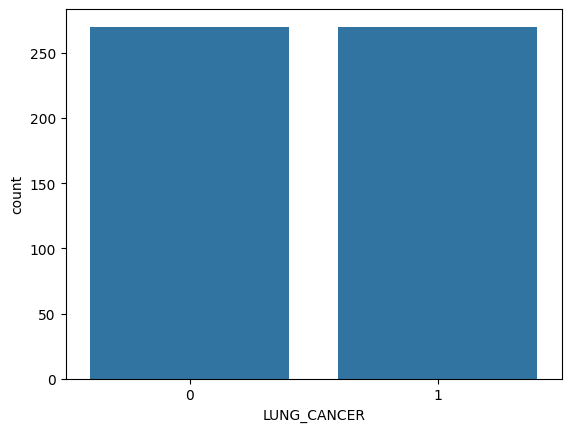

In [59]:
sns.countplot(x=y_sample)
plt.show()

## Split the data into train and test

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.20, random_state=42)

## 4. Chosic the best model and hyperparamters using gride search

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Models and hyperparameter grids
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'knn':KNeighborsClassifier()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'knn':{
    'n_neighbors': [ 11,13,15,17,19],
    'weights': ['uniform', 'distance'],
    'p':[3,4,5]
    }
    
}

# Function to train and evaluate a model
def train_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'best_params': grid_search.best_params_
    }

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate(model, param_grids[model_name], x_train, y_train, x_test, y_test)

print(results)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.4s[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.5s

[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   1.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None

/home/mohammedorabi2002/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohammedorabi2002/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

In [ ]:
results['LogisticRegression'] # OUT

{'accuracy': 0.9444444444444444,
 'precision': 0.9473684210526315,
 'recall': 0.9473684210526315,
 'f1': 0.9473684210526315,
 'roc_auc': 0.9442724458204333,
 'best_params': {'C': 0.1, 'solver': 'lbfgs'}}

In [66]:
results['RandomForest']

{'accuracy': 0.9537037037037037,
 'precision': 0.9333333333333333,
 'recall': 0.9824561403508771,
 'f1': 0.9572649572649573,
 'roc_auc': 0.9520123839009289,
 'best_params': {'max_depth': None,
  'min_samples_split': 2,
  'n_estimators': 200}}

In [ ]:
results['knn'] # OUT

{'accuracy': 0.8888888888888888,
 'precision': 0.9787234042553191,
 'recall': 0.8070175438596491,
 'f1': 0.8846153846153846,
 'roc_auc': 0.8937048503611971,
 'best_params': {'n_neighbors': 11, 'p': 3, 'weights': 'distance'}}

In [70]:
results['GradientBoosting']

{'accuracy': 0.9537037037037037,
 'precision': 0.9642857142857143,
 'recall': 0.9473684210526315,
 'f1': 0.9557522123893806,
 'roc_auc': 0.9540763673890609,
 'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}}

## 5. Evaluate model performance

In [72]:
def evaluate_model(x_train,x_test,y_train,y_test,ypred,model):
    print(f'Accuracy of train = {model.score(x_train,y_train)}')
    print(f'Accuracy of test = {model.score(x_test,y_test)}') 
    print()
    
    print(classification_report(y_test,ypred))
    print()
    
    cm=confusion_matrix(y_test,ypred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
    plt.title('confusion matrix of GradientBoosting')
    plt.xlabel('Predicated')
    plt.ylabel('True values')
    plt.show()
    

Accuracy of train = 0.9652777777777778
Accuracy of test = 0.9537037037037037

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.95      0.96        57

    accuracy                           0.95       108
   macro avg       0.95      0.95      0.95       108
weighted avg       0.95      0.95      0.95       108




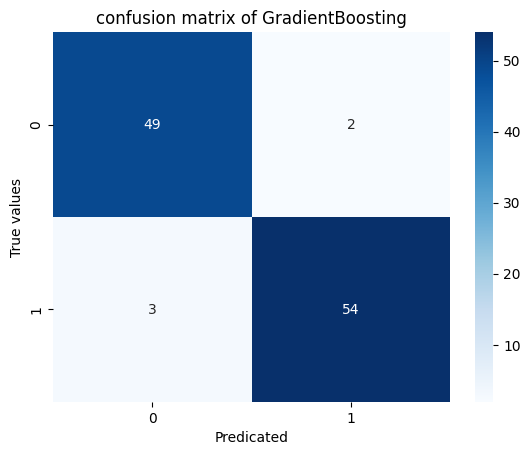

In [73]:
model=GradientBoostingClassifier(
                                    learning_rate=0.01,
                                    max_depth=3,
                                    n_estimators=200)
    
model.fit(x_train,y_train)
    
y_pred=model.predict(x_test)
    
evaluate_model(x_train,x_test,y_train,y_test,y_pred,model)

## Save model weights

In [74]:
import joblib
joblib.dump(model,"lung-cancer-gradint.joblib")

['lung-cancer-gradint.joblib']